In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dataframe_image as dfi
import os
import time

from datetime import datetime, timedelta, date
from matplotlib import dates as mpl_dates
from ipywidgets.widgets import Label, Layout, Button, Text 
from dateutil.relativedelta import relativedelta

Aanmaak variabelen

1e cel voor de graph, 2e cel voor de table

In [187]:
Device_ID_Lenght = 10
data = pd.read_csv('Dummy_data.CSV')
data['Date'] = pd.to_datetime(data.Date)
data['Week'] = data.Date.dt.isocalendar().week
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
device_ID = ''
period = 'Week'
timeGraph = pd.to_datetime('today').normalize()
searched_Data = data

data_A = np.array([])
data_B = np.array([])
data_C = np.array([])
data_D = np.array([])
deviceID_A = ' '
deviceID_B = ' '
deviceID_C = ' '
deviceID_D = ' '
timedates_A = np.array([])
timedates_B = np.array([])
timedates_C = np.array([])
timedates_D = np.array([])


In [188]:
def style_table(dataframe):
    newDf = dataframe.head(10)
    dataframe_styled = newDf.style.set_table_styles(
           [{
               'selector': 'th',
               'props': [
                   ('font-size', '30pt'),
                   ('color', '#660066')]
           },
           {
               'selector': 'td',
               'props': [
                   ('font-size', '25pt'),
                   ('color', 'black')]
           }
           ])

    dataframe_styled.hide_index()
    return dataframe_styled  

In [189]:
def update_table(df_filter, strValue):
    global sortOn
    if strValue == '':
        if sortOn == 'Temperature':
            df_update = df_filter.sort_values('Date', ascending=False)
            df_update = df_filter.sort_values(by=[sortOn], ascending=False)
        elif sortOn == 'Date':
            df_update = df_filter.sort_values('Date', ascending=False)
        else:
            df_update = df_filter.sort_values('Date', ascending=False)
            df_update = df_filter.sort_values([sortOn], ascending=True)
        
        df_update = df_update.drop_duplicates(subset='Device_ID', keep='first')
    else:
        if sortOn == 'Date':
            df_update=df_filter.sort_values(by=[sortOn], ascending=True)
        else:
            df_update=df_filter.sort_values(by=[sortOn])
        

    df_styled=style_table(df_update)
    
    os.remove("mytable.png")
    time.sleep(0.75)
    dfi.export(df_styled,"mytable.png", max_rows=20)

In [190]:
df = pd.read_csv("Dummy_data.csv", sep=",")
df_sorted=df.sort_values(by=['Device_ID'])
df_sorted.head(10)
styled = style_table(df_sorted)
dfi.export(styled,"mytable.png", max_rows=200)
sortOn = 'Device_ID'

Functies voor het opvragen van de data en de timedates voor de grafiek

In [191]:
def getData(deviceID):
    global period
    global timeGraph
    global searched_Data
    global data
    data = pd.read_csv('Dummy_data.CSV')
    data['Date'] = pd.to_datetime(data.Date)
    data['Week'] = data.Date.dt.isocalendar().week
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day

    device_ID = ('{}'.format(deviceID))
    

    if(period == 'Day'):
        timeDate = timeGraph.day
    elif(period == 'Week'):
        timeDate = timeGraph.week
    elif(period == 'Month'):
        timeDate = timeGraph.month


    searched_Data = data.loc[data['Device_ID'] == device_ID, :]
    searched_Data = searched_Data.loc[data[period] == timeDate, :]
    searched_Data = searched_Data.sort_values('Date', ascending=True)

    return searched_Data['Temperature']


def getTimeDates():
    global searched_Data

    return searched_Data['Date']



In [192]:
def prevPeriod():    
    global period
    global timeGraph
    if(period == 'Day'):
        timeGraph = timeGraph + relativedelta(days=-1)
    elif(period == 'Week'): 
        timeGraph = timeGraph + relativedelta(weeks=-1)
    elif(period == 'Month'):
        timeGraph = timeGraph + relativedelta(months=-1)   

def nextPeriod():    
    global period
    global timeGraph
    if(period == 'Day'):
        timeGraph = timeGraph + relativedelta(days=+1)
    elif(period == 'Week'): 
        timeGraph = timeGraph + relativedelta(weeks=+1)
    elif(period == 'Month'):
        timeGraph = timeGraph + relativedelta(months=+1)  

In [193]:
def updatePlot():
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D

    global data_A
    global data_B
    global data_C
    global data_D

    global timedates_A
    global timedates_B
    global timedates_C
    global timedates_D

    global period

    if deviceID_A != ' ':
        data_A = getData(deviceID_A)
        timedates_A = getTimeDates()
    if deviceID_B != ' ':
        data_B = getData(deviceID_B)
        timedates_B = getTimeDates()
    if deviceID_C != ' ':
        data_C = getData(deviceID_C)
        timedates_C = getTimeDates()
    if deviceID_D != ' ':
        data_D = getData(deviceID_D)
        timedates_D = getTimeDates()
    
    #Creating the plot
    if deviceID_B != ' ':
        if deviceID_C != ' ':
            #plot contains 3 or 4 graphs
            fig, ((graph_1,graph_3),(graph_2,graph_4)) = plt.subplots(2,2)
            if deviceID_A != ' ':
                graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
                graph_1.set_title(deviceID_A)
            if deviceID_B != ' ':
                graph_2.plot_date(timedates_B, data_B, linestyle = 'solid')
                graph_2.set_title(deviceID_B)
                graph_2.sharex(graph_1)
            if deviceID_C != ' ':
                graph_3.plot_date(timedates_C, data_C, linestyle = 'solid')
                graph_3.set_title(deviceID_C)
                #put in place here so dates will appear when there is only 3 graphs visable
                graph_4.sharex(graph_3)
            if deviceID_D != ' ':
                graph_4.plot_date(timedates_D, data_D, linestyle = 'solid')
                graph_4.set_title(deviceID_D)
        else:
            #plot contains 2 graphs
            fig, ((graph_1),(graph_2)) = plt.subplots(2,1)
            if deviceID_A != ' ':
                graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
                graph_1.set_title(deviceID_A)
            if deviceID_B != ' ':
                graph_2.plot_date(timedates_B, data_B, linestyle = 'solid')
                graph_2.set_title(deviceID_B)
                graph_2.sharex(graph_1)
    else:
        #plot only contains one graph
        fig, (graph_1) = plt.subplots(1,1)
        if deviceID_A != ' ':
            graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
            graph_1.set_title(deviceID_A)
    
    #Styling the plot
    fig.suptitle('Temperature')
    plt.style.use('seaborn')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    #Showing the plot
    plt.draw()

In [194]:
def addLine(device_ID):
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D
    
    data = getData(device_ID)
    #Setting the incomming data in the correct variable
    if  data.size != 0:
        if deviceID_A == ' ':
            deviceID_A = str(device_ID)
        elif deviceID_B == ' ':
            deviceID_B = str(device_ID)
        elif deviceID_C == ' ':
            deviceID_C = str(device_ID)
        elif deviceID_D == ' ':
            deviceID_D = str(device_ID)
        else:
            print('Cannot add more graphs')
    updatePlot()

In [195]:
def removeGraph(graph):
    global data_A
    global data_B
    global data_C
    global data_D
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D
    global timedates_A
    global timedates_B
    global timedates_C
    global timedates_D
    
    if graph == 'A':
        #Graph A getting removed
        data_A = data_B
        data_B = data_C
        data_C = data_D
        data_D = np.array([])
        deviceID_A = deviceID_B
        deviceID_B = deviceID_C
        deviceID_C = deviceID_D
        deviceID_D = ' '
        timedates_A = timedates_B
        timedates_B = timedates_C
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'B':
        #Graph B getting removed
        data_B = data_C
        data_C = data_D
        data_D = np.array([])
        deviceID_B = deviceID_C
        deviceID_C = deviceID_D
        deviceID_D = ' '
        timedates_B = timedates_C
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'C':
        #Graph C getting removed
        data_C = data_D
        data_D = np.array([])
        deviceID_C = deviceID_D
        deviceID_D = ' '
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'D':
        #Graph D getting removed
        data_D = np.array([])
        deviceID_D = ' '
        timedates_D = np.array([])
    elif graph == 'X':
        #All graphs getting removed
        data_A = np.array([])
        data_B = np.array([])
        data_C = np.array([])
        data_D = np.array([])
        deviceID_A = ' '
        deviceID_B = ' '
        deviceID_C = ' '
        deviceID_D = ' '
        timedates_A = np.array([])
        timedates_B = np.array([])
        timedates_C = np.array([])
        timedates_D = np.array([])       
    updatePlot()

In [196]:
import anvil.server
import anvil.media
import anvil.mpl_util

anvil.server.connect("YYR43HPYADI257LCFSUHXF6C-E37CHCQWPQTFV5FH")

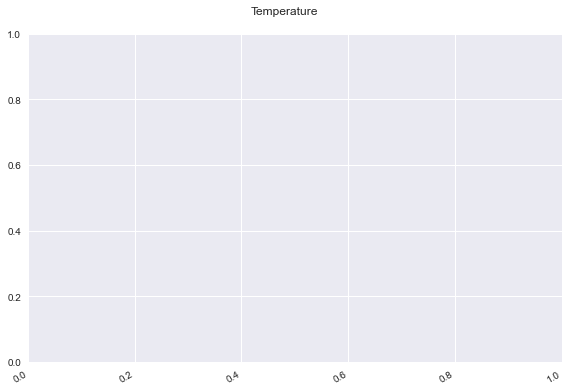

In [197]:
updatePlot()

@anvil.server.callable
def make_plot():
    updatePlot()
    return anvil.mpl_util.plot_image()

@anvil.server.callable
def headline_txt():
    headline_txt = "Testerde Test"
    return headline_txt

@anvil.server.callable
def search_deviceID(text_input):
    str(text_input)
    addLine(text_input)

@anvil.server.callable
def removeGraphFromPlot(graph):
    removeGraph(str(graph))

@anvil.server.callable
def changePeriod(periodType):
    global period
    period = str(periodType)

@anvil.server.callable
def next():
    nextPeriod()

@anvil.server.callable
def previous():
    prevPeriod()

@anvil.server.callable
def setTimeToday():
    global timeGraph
    timeGraph = pd.to_datetime('today').normalize()


@anvil.server.callable
def updateData():
    global data
    data = pd.read_csv('Dummy_data.CSV')
    data['Date'] = pd.to_datetime(data.Date)
    data['Week'] = data.Date.dt.isocalendar().week
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day

In [198]:
@anvil.server.callable
def handle_submit(value):
    value = str(value)
    df_filter=df[df.apply(lambda row: row.astype(str).str.contains(value).any(), axis=1)]
    update_table(df_filter,value)
    media_object = anvil.media.from_file('C:/Users/simon/Documents/GitHub/GUI-Heat-Tracing/mytable.png')
    return media_object

@anvil.server.callable
def handle_submit2(value, sorter):
    value = str(value)
    global sortOn 
    sortOn = sorter
    df_filter=df[df.apply(lambda row: row.astype(str).str.contains(value).any(), axis=1)]
    update_table(df_filter,value)
    media_object = anvil.media.from_file('C:/Users/simon/Documents/GitHub/GUI-Heat-Tracing/mytable.png')
    return media_object

@anvil.server.callable
def get_df():
    media_object = anvil.media.from_file('C:/Users/simon/Documents/GitHub/GUI-Heat-Tracing/mytable.png')
    return media_object